# Social Media and Mental Health Analysis
----

# import the raw data file and load into a temporay dataframe



In [1]:
#!pip3 install ydata-profiling
#!pip3 install --upgrade notebook ipywidgets
# !pip install Pyarrowpip install numpy pandas matplotlib seaborn ydata-profiling

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ydata_profiling import ProfileReport



#from IPython.display import display
#pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('./data/smmh.csv')
data.shape

(481, 21)

In [4]:
#load the import to a working data frame(df)
df = data.copy()

In [5]:
#to see rows and columns

df.shape

(481, 21)

In [6]:
df

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


#  Data Cleaning


In [7]:
#find columns
df.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [8]:
# Rename_Columns

In [9]:
df.rename(columns = {'1. What is your age?':'Age','2. Gender':'Gender','3. Relationship Status':'Relationship_Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliated_Organizations',
                       '6. Do you use social media?':'Social_Media_User',
                       '7. What social media platforms do you commonly use?':'Platforms_Used',
                       '8. What is the average time you spend on social media every day?':'Daily_Time_Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'No_purporse_scrolling_Frequency',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'Often_Distracted',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Restlessness',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'Distraction_Rate',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Worry_level_Rate',
                       '14. Do you find it difficult to concentrate on things?':'Difficulty_in_concentrating',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Comparison_Rate',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Comparison_Feelings',
                       '17. How often do you look to seek validation from features of social media?':'Seek_Validation',
                       '18. How often do you feel depressed or down?':'Often_Depressed',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Daily_Interest_Rate',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Sleep_Issues_Rate' },inplace=True)


In [10]:
df

,Timestamp,Age,Gender,Relationship_Status,Occupation,Affiliated_Organizations,Social_Media_User,Platforms_Used,Daily_Time_Spent,No_purporse_scrolling_Frequency,...,Restlessness,Distraction_Rate,Worry_level_Rate,Difficulty_in_concentrating,Comparison_Rate,Comparison_Feelings,Seek_Validation,Often_Depressed,Daily_Interest_Rate,Sleep_Issues_Rate
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


## Handling all nulls in the dataframe(df)

In [11]:
df.isnull().sum()

Timestamp                           0
Age                                 0
Gender                              0
Relationship_Status                 0
Occupation                          0
Affiliated_Organizations           30
Social_Media_User                   0
Platforms_Used                      0
Daily_Time_Spent                    0
No_purporse_scrolling_Frequency     0
Often_Distracted                    0
Restlessness                        0
Distraction_Rate                    0
Worry_level_Rate                    0
Difficulty_in_concentrating         0
Comparison_Rate                     0
Comparison_Feelings                 0
Seek_Validation                     0
Often_Depressed                     0
Daily_Interest_Rate                 0
Sleep_Issues_Rate                   0
dtype: int64

In [12]:
#return only the features with nulls
sorted_nulls =(df.isnull().sum().sort_values(ascending=False))
sorted_nulls[sorted_nulls>0]

Affiliated_Organizations    30
dtype: int64

In [13]:
#identify the null vales in the 'Affiliated_Organization_columns
df[df['Affiliated_Organizations'].isnull()].copy()


,Timestamp,Age,Gender,Relationship_Status,Occupation,Affiliated_Organizations,Social_Media_User,Platforms_Used,Daily_Time_Spent,No_purporse_scrolling_Frequency,...,Restlessness,Distraction_Rate,Worry_level_Rate,Difficulty_in_concentrating,Comparison_Rate,Comparison_Feelings,Seek_Validation,Often_Depressed,Daily_Interest_Rate,Sleep_Issues_Rate
17,4/18/2022 20:21:09,25.0,Male,Single,School Student,NaN,Yes,"Facebook, Instagram, YouTube, Reddit",Between 4 and 5 hours,5,...,4,4,3,3,1,4,2,2,2,2
24,4/18/2022 20:36:42,23.0,Male,Single,University Student,NaN,Yes,"Facebook, Twitter, YouTube, Discord",Between 3 and 4 hours,3,...,5,5,5,5,4,1,3,3,5,5
42,4/18/2022 21:48:07,56.0,Female,Married,Retired,NaN,Yes,YouTube,Between 1 and 2 hours,1,...,1,1,3,1,1,3,1,2,3,1
47,4/18/2022 22:00:21,17.0,Female,Single,School Student,NaN,Yes,"Instagram, YouTube, Reddit, Pinterest",Between 3 and 4 hours,4,...,1,3,5,3,4,2,1,3,5,1
63,4/18/2022 23:19:30,25.0,Male,Single,Salaried Worker,NaN,Yes,Reddit,Between 1 and 2 hours,3,...,1,3,2,4,1,3,1,5,1,5
64,4/18/2022 23:23:52,19.0,Female,Single,University Student,NaN,Yes,"Discord, Reddit",Between 2 and 3 hours,2,...,1,5,3,5,1,3,1,1,5,4
74,4/19/2022 1:16:34,23.0,Female,Single,Retired,NaN,Yes,"Facebook, YouTube, Discord, Reddit",Between 4 and 5 hours,4,...,3,3,4,5,3,2,4,5,5,4
80,4/19/2022 2:58:24,22.0,Male,Single,University Student,NaN,Yes,"Twitter, Instagram, YouTube, Snapchat, Discord...",Between 2 and 3 hours,4,...,4,5,5,5,3,3,1,4,4,5
85,4/19/2022 7:10:09,24.0,NB,Single,Salaried Worker,NaN,Yes,"YouTube, Reddit",Between 2 and 3 hours,4,...,2,3,5,2,3,2,2,4,3,1
97,4/19/2022 14:08:55,20.0,Male,Single,School Student,NaN,Yes,"YouTube, Reddit",More than 5 hours,4,...,1,2,1,1,2,2,1,4,3,2


In [14]:
# replace null values
df['Affiliated_Organizations'] = df['Affiliated_Organizations'].fillna('Unknown')
df

,Timestamp,Age,Gender,Relationship_Status,Occupation,Affiliated_Organizations,Social_Media_User,Platforms_Used,Daily_Time_Spent,No_purporse_scrolling_Frequency,...,Restlessness,Distraction_Rate,Worry_level_Rate,Difficulty_in_concentrating,Comparison_Rate,Comparison_Feelings,Seek_Validation,Often_Depressed,Daily_Interest_Rate,Sleep_Issues_Rate
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


In [15]:
#Retest for nulls
df.isnull().sum()

Timestamp                          0
Age                                0
Gender                             0
Relationship_Status                0
Occupation                         0
Affiliated_Organizations           0
Social_Media_User                  0
Platforms_Used                     0
Daily_Time_Spent                   0
No_purporse_scrolling_Frequency    0
Often_Distracted                   0
Restlessness                       0
Distraction_Rate                   0
Worry_level_Rate                   0
Difficulty_in_concentrating        0
Comparison_Rate                    0
Comparison_Feelings                0
Seek_Validation                    0
Often_Depressed                    0
Daily_Interest_Rate                0
Sleep_Issues_Rate                  0
dtype: int64

# Data Transformation

In [16]:
df.dtypes

Timestamp                           object
Age                                float64
Gender                              object
Relationship_Status                 object
Occupation                          object
Affiliated_Organizations            object
Social_Media_User                   object
Platforms_Used                      object
Daily_Time_Spent                    object
No_purporse_scrolling_Frequency      int64
Often_Distracted                     int64
Restlessness                         int64
Distraction_Rate                     int64
Worry_level_Rate                     int64
Difficulty_in_concentrating          int64
Comparison_Rate                      int64
Comparison_Feelings                  int64
Seek_Validation                      int64
Often_Depressed                      int64
Daily_Interest_Rate                  int64
Sleep_Issues_Rate                    int64
dtype: object

In [17]:
#convert 'Timestamp' column into pandas Timestamp format
#df['Timestamp']  = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S')
# Assuming your DataFrame is named 'df'
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour

df.dtypes


Timestamp                          datetime64[ns]
Age                                       float64
Gender                                     object
Relationship_Status                        object
Occupation                                 object
Affiliated_Organizations                   object
Social_Media_User                          object
Platforms_Used                             object
Daily_Time_Spent                           object
No_purporse_scrolling_Frequency             int64
Often_Distracted                            int64
Restlessness                                int64
Distraction_Rate                            int64
Worry_level_Rate                            int64
Difficulty_in_concentrating                 int64
Comparison_Rate                             int64
Comparison_Feelings                         int64
Seek_Validation                             int64
Often_Depressed                             int64
Daily_Interest_Rate                         int64


In [18]:
df.tail()

,Timestamp,Age,Gender,Relationship_Status,Occupation,Affiliated_Organizations,Social_Media_User,Platforms_Used,Daily_Time_Spent,No_purporse_scrolling_Frequency,...,Distraction_Rate,Worry_level_Rate,Difficulty_in_concentrating,Comparison_Rate,Comparison_Feelings,Seek_Validation,Often_Depressed,Daily_Interest_Rate,Sleep_Issues_Rate,hour
476,2022-05-21 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,3,4,4,2,4,3,4,4,23
477,2022-05-22 00:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,3,4,4,4,2,4,4,4,1,0
478,2022-05-22 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,3,2,3,3,3,4,2,2,2,10
479,2022-07-14 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,3,3,2,2,3,4,4,5,4,19
480,2022-11-12 13:16:50,53.0,Male,Married,Salaried Worker,Private,Yes,"Facebook, YouTube",Less than an Hour,2,...,3,1,1,3,3,2,2,2,3,13


In [19]:
#create unique index 
df.insert(0, "Id", range(1, 482), True)



In [20]:
df

,Id,Timestamp,Age,Gender,Relationship_Status,Occupation,Affiliated_Organizations,Social_Media_User,Platforms_Used,Daily_Time_Spent,...,Distraction_Rate,Worry_level_Rate,Difficulty_in_concentrating,Comparison_Rate,Comparison_Feelings,Seek_Validation,Often_Depressed,Daily_Interest_Rate,Sleep_Issues_Rate,hour
0,1,2022-04-18 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,...,5,2,5,2,3,2,5,4,5,19
1,2,2022-04-18 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,...,4,5,4,5,1,1,5,4,5,19
2,3,2022-04-18 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,...,2,5,4,3,3,1,4,2,5,19
3,4,2022-04-18 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,...,3,5,3,5,1,2,4,3,2,19
4,5,2022-04-18 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,...,4,5,5,3,3,3,4,4,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,477,2022-05-21 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,...,4,3,4,4,2,4,3,4,4,23
477,478,2022-05-22 00:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,...,3,4,4,4,2,4,4,4,1,0
478,479,2022-05-22 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,...,3,2,3,3,3,4,2,2,2,10
479,480,2022-07-14 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,...,3,3,2,2,3,4,4,5,4,19


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Id                               481 non-null    int64         
 1   Timestamp                        481 non-null    datetime64[ns]
 2   Age                              481 non-null    float64       
 3   Gender                           481 non-null    object        
 4   Relationship_Status              481 non-null    object        
 5   Occupation                       481 non-null    object        
 6   Affiliated_Organizations         481 non-null    object        
 7   Social_Media_User                481 non-null    object        
 8   Platforms_Used                   481 non-null    object        
 9   Daily_Time_Spent                 481 non-null    object        
 10  No_purporse_scrolling_Frequency  481 non-null    int64        

In [22]:
# convert 'Age' type from float to integer
df['Age'] = df['Age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Id                               481 non-null    int64         
 1   Timestamp                        481 non-null    datetime64[ns]
 2   Age                              481 non-null    int64         
 3   Gender                           481 non-null    object        
 4   Relationship_Status              481 non-null    object        
 5   Occupation                       481 non-null    object        
 6   Affiliated_Organizations         481 non-null    object        
 7   Social_Media_User                481 non-null    object        
 8   Platforms_Used                   481 non-null    object        
 9   Daily_Time_Spent                 481 non-null    object        
 10  No_purporse_scrolling_Frequency  481 non-null    int64        

In [23]:
#find unique and counts
df['Gender'].nunique()
df['Gender'].value_counts()

Gender
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64

In [24]:
#We need to classify Gender in 3 categories only .Male, Female and Others
#Combining the unique entries that all fall under the "Others" category
df.replace('Non-binary','Others', inplace=True)
df.replace('Nonbinary ','Others', inplace=True)
df.replace('NB','Others', inplace=True)
df.replace('unsure ','Others', inplace=True)
df.replace('Non binary ','Others', inplace=True)
df.replace('Trans','Others', inplace=True)
df.replace('There are others???','Others', inplace=True)


In [25]:
df['Gender'].nunique()
df['Gender'].value_counts()

Gender
Female    263
Male      211
Others      7
Name: count, dtype: int64

In [26]:
df.head(3)

,Id,Timestamp,Age,Gender,Relationship_Status,Occupation,Affiliated_Organizations,Social_Media_User,Platforms_Used,Daily_Time_Spent,...,Distraction_Rate,Worry_level_Rate,Difficulty_in_concentrating,Comparison_Rate,Comparison_Feelings,Seek_Validation,Often_Depressed,Daily_Interest_Rate,Sleep_Issues_Rate,hour
0,1,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,...,5,2,5,2,3,2,5,4,5,19
1,2,2022-04-18 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,...,4,5,4,5,1,1,5,4,5,19
2,3,2022-04-18 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,...,2,5,4,3,3,1,4,2,5,19


In [27]:


# Define a list of social media platforms to check for
social_media_platforms = ['tiktok', 'facebook', 'twitter', 'pinterest', 'snapchat', 'discord', 'instagram', 'youtube', 'reddit']

# Initialize a dictionary to store the boolean values for each platform
platform_usage = {}

# Iterate through the social media platforms list
for platform in social_media_platforms:
    # Create a new column in the DataFrame indicating whether the platform is mentioned in the response
    df[f'use_{platform}'] = df['Platforms_Used'].str.lower().str.contains(platform)
    # Store the result in the dictionary
    platform_usage[f'use_{platform}'] = df[f'use_{platform}'].tolist()

# Create a new DataFrame from the dictionary
result_df = pd.DataFrame(platform_usage)

# Display the result
result_df


,use_tiktok,use_facebook,use_twitter,use_pinterest,use_snapchat,use_discord,use_instagram,use_youtube,use_reddit
0,False,True,True,False,False,True,True,True,True
1,False,True,True,False,False,True,True,True,True
2,False,True,False,True,False,False,True,True,False
3,False,True,False,False,False,False,True,False,False
4,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...
476,False,True,False,False,False,False,True,True,False
477,False,True,False,False,False,False,False,True,False
478,False,True,False,False,False,False,False,True,False
479,False,True,True,True,False,True,True,True,False


In [28]:
# Assuming 'use_tiktok' is a valid column in 'df'
# Make sure the column name matches exactly

# Iterate through the social media platforms list
for platform in social_media_platforms:
    if f'use_{platform}' in df.columns:
        platform_usage[f'use_{platform}'] = df[f'use_{platform}'].tolist()
    else:
        print(f"Column 'use_{platform}' does not exist in df.")

# Create a new DataFrame from the dictionary
result_df = pd.DataFrame(platform_usage)


In [29]:
df

,Id,Timestamp,Age,Gender,Relationship_Status,Occupation,Affiliated_Organizations,Social_Media_User,Platforms_Used,Daily_Time_Spent,...,hour,use_tiktok,use_facebook,use_twitter,use_pinterest,use_snapchat,use_discord,use_instagram,use_youtube,use_reddit
0,1,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,...,19,False,True,True,False,False,True,True,True,True
1,2,2022-04-18 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,...,19,False,True,True,False,False,True,True,True,True
2,3,2022-04-18 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,...,19,False,True,False,True,False,False,True,True,False
3,4,2022-04-18 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,...,19,False,True,False,False,False,False,True,False,False
4,5,2022-04-18 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,...,19,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,477,2022-05-21 23:38:28,24,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,...,23,False,True,False,False,False,False,True,True,False
477,478,2022-05-22 00:01:05,26,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,...,0,False,True,False,False,False,False,False,True,False
478,479,2022-05-22 10:29:21,29,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,...,10,False,True,False,False,False,False,False,True,False
479,480,2022-07-14 19:33:47,21,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,...,19,False,True,True,True,False,True,True,True,False


In [30]:
# Calculate the total number of respondents
total_respondents = len(df)

# Calculate the percentage of people who use each platform
platform_percentages = {}

for platform in social_media_platforms:
    # Count the number of respondents who use the platform
    platform_users = df[f'use_{platform}'].sum()
    # Calculate the percentage
    percentage = (platform_users / total_respondents) * 100
    # Store the result in the dictionary
    platform_percentages[platform] = percentage

# Display the percentages
for platform, percentage in platform_percentages.items():
    print(f"{platform}: {percentage:.2f}%")


tiktok: 19.54%
facebook: 84.62%
twitter: 27.23%
pinterest: 30.15%
snapchat: 37.63%
discord: 41.16%
instagram: 74.64%
youtube: 85.65%
reddit: 26.20%


In [31]:
platform_df = pd.DataFrame.from_dict(platform_percentages, orient='index', columns=['Percentage'])
styled_df = platform_df.style.format(precision=2, thousands=".", decimal=",") \
                         .format_index(str.upper, axis=0) \
                         .set_caption("Social Media Platform Percentages")

# Display the styled DataFrame
styled_df

,Percentage
TIKTOK,"19,54"
FACEBOOK,"84,62"
TWITTER,"27,23"
PINTEREST,"30,15"
SNAPCHAT,"37,63"
DISCORD,"41,16"
INSTAGRAM,"74,64"
YOUTUBE,"85,65"
REDDIT,"26,20"


## Create fields based on conditional

In [32]:
#We are creating a new column 'Mental Health Disorders'

In [33]:
# Define your categories
conditions = [
    (df['No_purporse_scrolling_Frequency'] >= 3) | (df['Often_Distracted'] >= 3),
    (df['Restlessness'] >= 3) | (df['Worry_level_Rate'] >= 3),
    (df['Often_Depressed'] >= 3) | (df['Daily_Interest_Rate'] >= 3),
    (df['Comparison_Rate'] >= 3) | (df['Seek_Validation'] >= 3)
]


In [34]:
# Assign category names
category_names = ['ADHD', 'Anxiety', 'Depression', 'Low Self Esteem']


In [35]:
# Create the new 'Category' column
df['Mental_Health_Disorders'] = pd.Series(np.select(conditions, category_names, default='Other'))


df.tail()

,Id,Timestamp,Age,Gender,Relationship_Status,Occupation,Affiliated_Organizations,Social_Media_User,Platforms_Used,Daily_Time_Spent,...,use_tiktok,use_facebook,use_twitter,use_pinterest,use_snapchat,use_discord,use_instagram,use_youtube,use_reddit,Mental_Health_Disorders
476,477,2022-05-21 23:38:28,24,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,...,False,True,False,False,False,False,True,True,False,ADHD
477,478,2022-05-22 00:01:05,26,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,...,False,True,False,False,False,False,False,True,False,Anxiety
478,479,2022-05-22 10:29:21,29,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,...,False,True,False,False,False,False,False,True,False,ADHD
479,480,2022-07-14 19:33:47,21,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,...,False,True,True,True,False,True,True,True,False,ADHD
480,481,2022-11-12 13:16:50,53,Male,Married,Salaried Worker,Private,Yes,"Facebook, YouTube",Less than an Hour,...,False,True,False,False,False,False,False,True,False,ADHD


## Exploratory Data Analysis(EDA)

In [36]:
df.columns

Index(['Id', 'Timestamp', 'Age', 'Gender', 'Relationship_Status', 'Occupation',
       'Affiliated_Organizations', 'Social_Media_User', 'Platforms_Used',
       'Daily_Time_Spent', 'No_purporse_scrolling_Frequency',
       'Often_Distracted', 'Restlessness', 'Distraction_Rate',
       'Worry_level_Rate', 'Difficulty_in_concentrating', 'Comparison_Rate',
       'Comparison_Feelings', 'Seek_Validation', 'Often_Depressed',
       'Daily_Interest_Rate', 'Sleep_Issues_Rate', 'hour', 'use_tiktok',
       'use_facebook', 'use_twitter', 'use_pinterest', 'use_snapchat',
       'use_discord', 'use_instagram', 'use_youtube', 'use_reddit',
       'Mental_Health_Disorders'],
      dtype='object')

C:\Users\maria\miniconda3\envs\pc311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


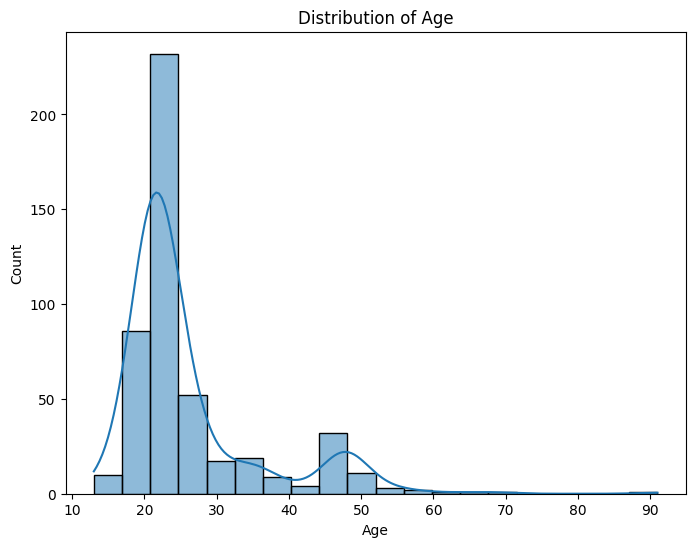

In [37]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

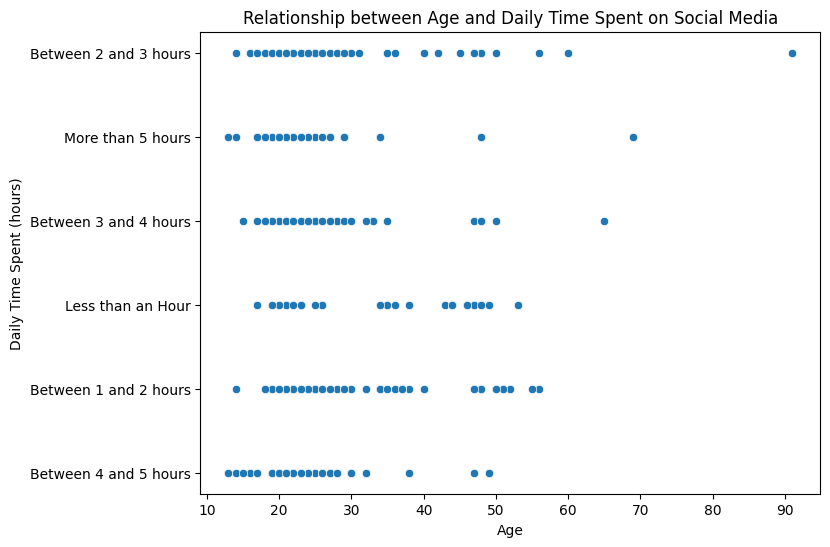

In [38]:
# Relationship between Age and Daily_Time_Spent
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Daily_Time_Spent', data=df)
plt.title('Relationship between Age and Daily Time Spent on Social Media')
plt.xlabel('Age')
plt.ylabel('Daily Time Spent (hours)')
plt.show()

## Save the DataFrame to a CSV file